In [2]:
import pandas as pd


# Возьмем данные с титаника
path = 'titanic.csv'

data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Задание 1: Вывести общее количество пассажиров в наборе данных.

amount_of_passengers = len(data)
amount_of_passengers

891

In [4]:
# Задание 2: Подсчитать количество выживших и погибших пассажиров.

survived = data[data["Survived"] == 1]
len(survived)

342

In [5]:
dead = data[data["Survived"] == 0]
len(dead)

549

In [6]:
# Более предпочтительно
survived_count = data['Survived'].value_counts()
survived_count

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# Проверка
len(survived) + len(dead) == len(data)

True

In [8]:
# Задание 3: Найти средний возраст пассажиров.

mean_age = data["Age"].mean().round()
mean_age

30.0

In [9]:
# Задание 4: Определить долю мужчин и женщин среди пассажиров.

women = len(data[data["Sex"] == 'female']) / len(data) * 100
women

35.24130190796858

In [10]:
men = len(data[data["Sex"] == 'male']) / len(data) * 100
men

64.75869809203144

In [11]:
# Более предпочтительно
gender_ratio = data['Sex'].value_counts(normalize=True)
gender_ratio

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [12]:
# Проверка
round(women + men) == 100

True

In [13]:
# Задание 5: Найти самую высокую и самую низкую стоимость билета.

highest_price = data["Fare"].max()
lowest_price = data["Fare"].min()
highest_price, lowest_price

(512.3292, 0.0)

In [14]:
# Задание 6: Подсчитать количество пассажиров в каждом классе.

passengers_per_class = data["Pclass"].value_counts().sort_index()
passengers_per_class

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [15]:
# Задание 7: Найти средний возраст пассажиров для каждого класса.

mean_age_per_class = data.groupby("Pclass")["Age"].mean()
mean_age_per_class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
# Задание 8: Создать новый столбец Возрастная_группа, разделив пассажиров на возрастные группы.

def make_groups(age):
    if age < 18:
        return "Дети"
    elif age < 60:
        return "Взрослые"
    else:
        return "Пожилые"


data["Возрастная_группа"] = data["Age"].apply(make_groups)
data['Возрастная_группа'].value_counts()

Возрастная_группа
Взрослые    575
Пожилые     203
Дети        113
Name: count, dtype: int64

In [17]:
# Задание 9: Найти среднюю выживаемость пассажиров в зависимости от пола и класса.

survival_rate_by_sex_class = data.groupby(["Sex", "Pclass"])["Survived"].mean()
survival_rate_by_sex_class

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [18]:
# Задание 10: Определить самое популярное женское имя среди пассажиров.

def extract_first_name(fullname):
    return fullname.split(',')[1].split('.')[1].strip()


female_first_names = data[data["Sex"] == 'female']["Name"].apply(extract_first_name)
most_popular_female_names = female_first_names.value_counts()
most_popular_female_names

Name
Mary                        6
Bertha                      4
Anna Sofia                  3
Anna                        3
Kate                        2
                           ..
Emily Borie                 1
William (Anna Sylfven)      1
Helmina Josefina            1
Sinai (Miriam Sternin)      1
Catherine Helen "Carrie"    1
Name: count, Length: 295, dtype: int64

In [19]:
most_popular_female_name = most_popular_female_names.idxmax()
most_popular_female_name

'Mary'

In [20]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Возрастная_группа
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Взрослые
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Взрослые
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Взрослые
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Взрослые
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Взрослые
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Пожилые
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Взрослые
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Дети
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Взрослые
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Дети


In [22]:
# Задание 11: Найти количество пассажиров разных возрастных групп (0-10 лет, 11-20 лет и так далее).

age_bins = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
data['Age_group'] = pd.cut(x=data["Age"], bins=age_bins, labels=age_labels)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Возрастная_группа,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Взрослые,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Взрослые,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Взрослые,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Взрослые,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Взрослые,31-40
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Пожилые,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Взрослые,51-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Дети,1-10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Взрослые,21-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Дети,11-20


In [24]:
data["Age_group"].value_counts().sort_index()

Age_group
1-10      50
11-20    115
21-30    230
31-40    155
41-50     86
51-60     42
61-70     17
71-80      5
81-90      0
Name: count, dtype: int64

In [32]:
# Повторить (добавить новым столбцом название класса)
data["Class_name"] = pd.cut(x=data["Pclass"], bins=[0, 1, 2, 3], labels=['Низший', 'Средний', 'Высший'])
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Возрастная_группа,Age_group,Class_name
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Взрослые,21-30,Средний
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Взрослые,11-20,Низший
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Пожилые,NaN,Высший
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Взрослые,21-30,Низший
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Взрослые,31-40,Высший


In [33]:
# Задание 12: Создать новый столбец Семейная_группа, который будет обозначать, путешествовал ли пассажир один, с партнером или семьей.
data[["SibSp", "Parch"]].value_counts()

SibSp  Parch
0      0        537
1      0        123
       1         57
0      1         38
       2         29
1      2         19
2      0         16
4      2          9
       1          9
3      2          7
       1          7
2      1          7
8      2          7
5      2          5
2      2          4
1      5          3
       4          3
       3          3
3      0          2
0      5          2
2      3          1
0      4          1
       3          1
1      6          1
Name: count, dtype: int64

In [34]:
def family_group(row):
    if row["SibSp"] == 0 and row["Parch"] == 0:
        return 'Single'
    elif row["SibSp"] > 0 and row["Parch"] > 0:
        return 'Family'
    else:
        return 'Partner'


data["Family_group"] = data.apply(family_group, axis=1)
data["Family_group"].value_counts()

Family_group
Single     537
Partner    212
Family     142
Name: count, dtype: int64

In [37]:
# Задание 13: Найти среднюю стоимость билета для каждого класса и пола пассажиров.

average_fare = data.groupby(["Pclass", "Sex"])["Fare"].mean()
average_fare

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

In [39]:
# Задание 14: Создать сводную таблицу, показывающую количество выживших и погибших пассажиров по классам и полу.

pivot_table_survived = pd.pivot_table(data, index="Pclass", columns="Sex", values="Survived", aggfunc="sum")
pivot_table_survived

Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


In [42]:
pivot_table_survived = data.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="sum")
pivot_table_survived

Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


In [65]:
# Задание 15: Определить самый молодой и самый старый пассажир на борту.

data[data["Age"] == data["Age"].min()]["Name"], data[data["Age"] == data["Age"].max()]["Name"]

(803    Thomas, Master. Assad Alexander
 Name: Name, dtype: object,
 630    Barkworth, Mr. Algernon Henry Wilson
 Name: Name, dtype: object)

In [63]:
# другой вариант

youngest_passenger = data.loc[data["Age"].idxmin()]
oldest_passenger = data.loc[data["Age"].idxmax()]

youngest_passenger, oldest_passenger

(PassengerId                                      804
 Survived                                           1
 Pclass                                             3
 Name                 Thomas, Master. Assad Alexander
 Sex                                             male
 Age                                             0.42
 SibSp                                              0
 Parch                                              1
 Ticket                                          2625
 Fare                                          8.5167
 Cabin                                            NaN
 Embarked                                           C
 Возрастная_группа                               Дети
 Age_group                                        NaN
 Class_name                                    Высший
 Family_group                                 Partner
 Name: 803, dtype: object,
 PassengerId                                           631
 Survived                                         

In [72]:
# Задание 16: Подсчитать количество пассажиров из разных портов посадки.

data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [75]:
# Задание 17: Найти средний возраст выживших и погибших пассажиров.

data.groupby("Survived")["Age"].mean().rename({0: "Погибших", 1: "Выживших"})

Survived
Погибших    30.626179
Выживших    28.343690
Name: Age, dtype: float64

In [77]:
# Задание 18: Определить, есть ли корреляция между стоимостью билета и выживаемостью пассажира.

correlation = data["Survived"].corr(data["Fare"])
correlation

0.2573065223849625

Text(0.5, 1.0, 'Гистограмма пассажиров по возрастной группе')

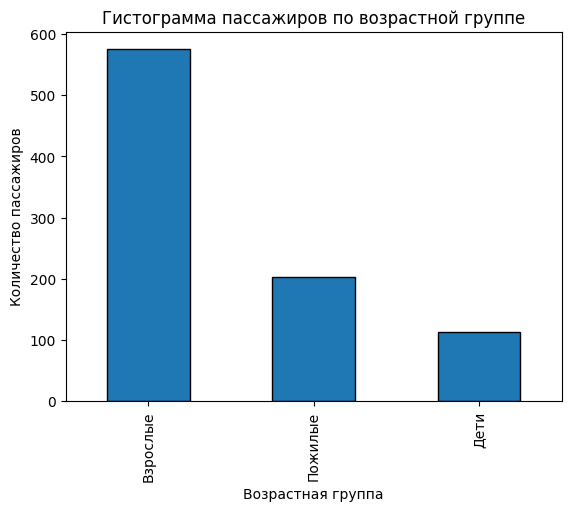

In [85]:
# Задание 19: Подсчитать количество пассажиров в каждой возрастной группе (каждый год) и визуализировать результат с помощью гистограммы.

import matplotlib.pyplot as plt


data["Возрастная_группа"].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма пассажиров по возрастной группе')

(0.0, 80.0)

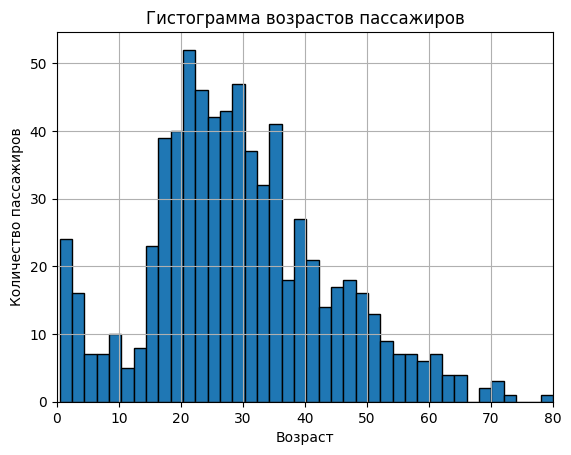

In [92]:
# Другой вариант

age_histogram = data['Age'].hist(bins=40, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма возрастов пассажиров')
plt.xlim(0, 80)

In [96]:
# Задание 20: Определить, какой процент пассажиров путешествовал с семьей (более одного члена семьи на борту).

len(data[data["Family_group"] == "Family"]) / len(data) * 100

15.937149270482603